<a href="https://colab.research.google.com/github/HiyaJain22/Compute-Tasks/blob/main/LogReg_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

###Q1 Import the dataset and try to understand what information each column is giving. What is our target variable? Is this a classification or regression problem?

Dataset link: https://drive.google.com/file/d/1A-iAsI3MUU6o9oh5AE1NG1kVU5KD60Ms/view?usp=sharing


In [3]:
#Import dataset
df=pd.read_csv("/content/heart_study.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


sex : male or female (Nominal)

age : age of the patient (Continuous)

education: maximum level of education of the patient

currentSmoker : whether or not the patient is a current smoker (Nominal)

cigsPerDay : the number of cigarettes that the person smoked on average in one day (Continuous)

BPMeds : whether or not the patient was on blood pressure medication (Nominal)

prevalentStroke : whether or not the patient had previously had a stroke (Nominal)

prevalentHyp : whether or not the patient was Hypertension (Nominal)

diabetes : whether or not the patient had diabetes (Nominal)

totChol : total cholesterol level (Continuous)

sysBP : systolic blood pressure (Continuous)

diaBP : diastolic blood pressure (Continuous)

BMI : Body Mass Index (Continuous)

heartRate : heart rate (Continuous)

glucose : glucose level (Continuous)

TenYearCHD : 10 year risk of Coronary Heart Disease (CHD) (binary: 1 (Yes), 0 (No))

###Q2. Are there any columns which give information about something totally irrelevant to whether a person has a heart disease or not? If yes, drop the column. Also rename the column 'male' to 'sex_male'.

In [4]:
#drop and/or rename columns
df1=df.drop(['education'], axis=1)
df1


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [5]:
df2=df1.rename(columns = {'male':'sex_male'})
df2

,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


###Q3. Find the number of null values in each column and decide whether you can drop them or not. If you cannot drop them, use an appropriate method to deal with them

In [6]:
#Deal with null values
df2.isnull().sum()

sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
mean_value=df2.mean()
df3=df2.fillna(mean_value)
df3

,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.000000,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,0,0.0,0.000000,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1,20.0,0.000000,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,1,30.0,0.000000,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,1,23.0,0.000000,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,0.029615,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1,15.0,0.000000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.963655,0
4237,0,52,0,0.0,0.000000,0,0,0,269.0,133.5,83.0,21.47,80.0,107.000000,0
4238,1,40,0,0.0,0.000000,0,1,0,185.0,141.0,98.0,25.60,67.0,72.000000,0


In [8]:
df3.isnull().sum()

sex_male           0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

###Q4. The following code is set up for you, replace 'dataframe' with the name of the your variable. What do you understand from this EDA? Why do some graphs have only two bars, at 0 and 1 and others have multiple?

 Attributes with Continuous datavalues have multiple bars which the ones with  nominal have only 2 bars 0 and 1 

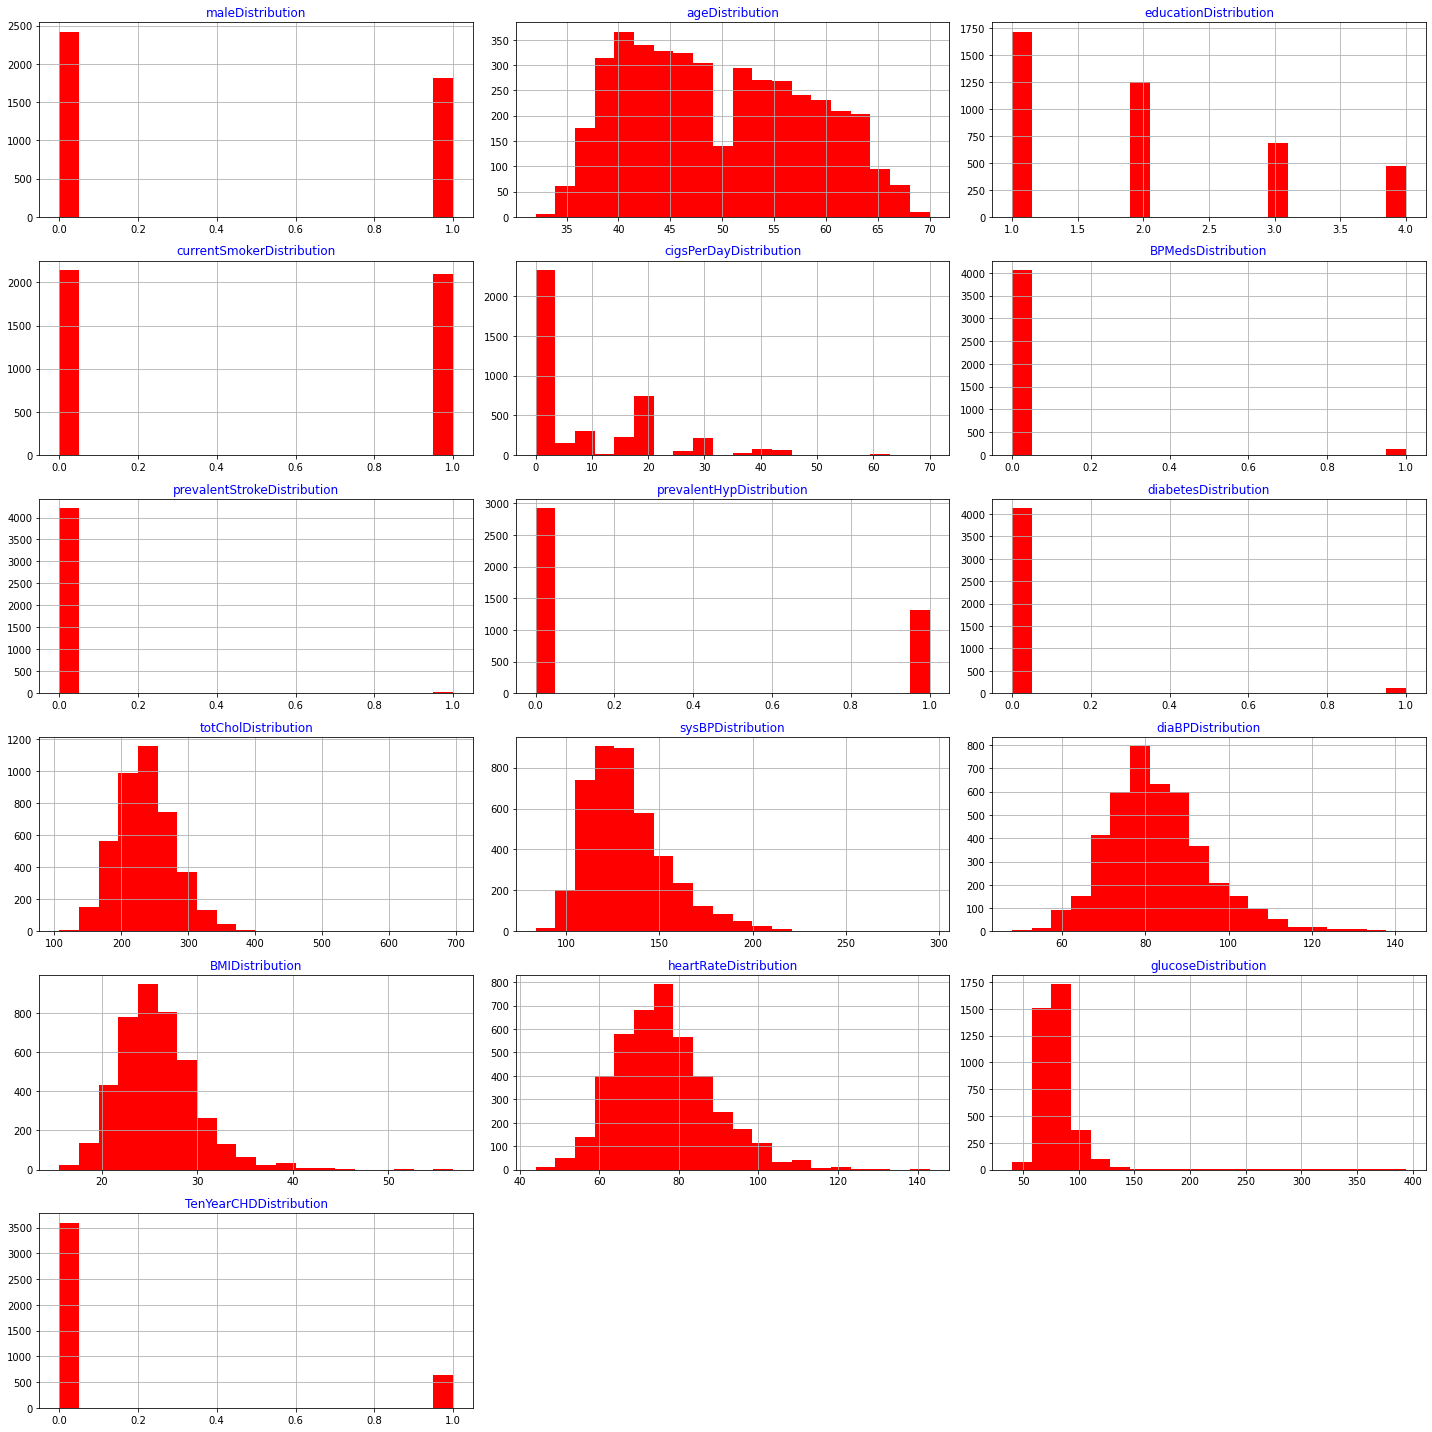

In [9]:
def draw_histograms(df, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        df[feature].hist(bins=20,ax=ax,facecolor='red')
        ax.set_title(feature+"Distribution", color='blue')
    fig.tight_layout()
    plt.show()
draw_histograms(df,df.columns, 6, 3)

###Q5. Using sns.countplot find out number of Positive cases and Negative cases in the dataset, i.e., in your target column.

In [10]:
#Code
df4=df3.corr()

In [11]:
df4

,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
sex_male,1.000000,-0.029014,0.197026,0.316023,-0.052203,-0.004550,0.005853,0.015693,-0.070064,-0.035879,0.058199,0.081705,-0.116913,0.005718,0.088374
age,-0.029014,1.000000,-0.213662,-0.192534,0.122036,0.057679,0.306799,0.101314,0.260691,0.394053,0.205586,0.135578,-0.012839,0.116951,0.225408
currentSmoker,0.197026,-0.213662,1.000000,0.767055,-0.048621,-0.032980,-0.103710,-0.044285,-0.046211,-0.130281,-0.107933,-0.167483,0.062678,-0.054062,0.019448
cigsPerDay,0.316023,-0.192534,0.767055,1.000000,-0.045847,-0.032711,-0.066444,-0.037086,-0.026182,-0.088523,-0.056473,-0.092888,0.075257,-0.056020,0.057646
BPMeds,-0.052203,0.122036,-0.048621,-0.045847,1.000000,0.115008,0.259125,0.051584,0.078973,0.252023,0.192387,0.099586,0.015172,0.048925,0.086805
prevalentStroke,-0.004550,0.057679,-0.032980,-0.032711,0.115008,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.024856,-0.017674,0.018065,0.061823
prevalentHyp,0.005853,0.306799,-0.103710,-0.066444,0.259125,0.074791,1.000000,0.077752,0.162683,0.696656,0.615840,0.300599,0.146777,0.082757,0.177458
diabetes,0.015693,0.101314,-0.044285,-0.037086,0.051584,0.006955,0.077752,1.000000,0.040161,0.111265,0.050260,0.086282,0.048986,0.605709,0.097344
totChol,-0.070064,0.260691,-0.046211,-0.026182,0.078973,0.000105,0.162683,0.040161,1.000000,0.207436,0.163423,0.115013,0.090678,0.044710,0.081807
sysBP,-0.035879,0.394053,-0.130281,-0.088523,0.252023,0.057000,0.696656,0.111265,0.207436,1.000000,0.783952,0.325172,0.182084,0.134561,0.216374


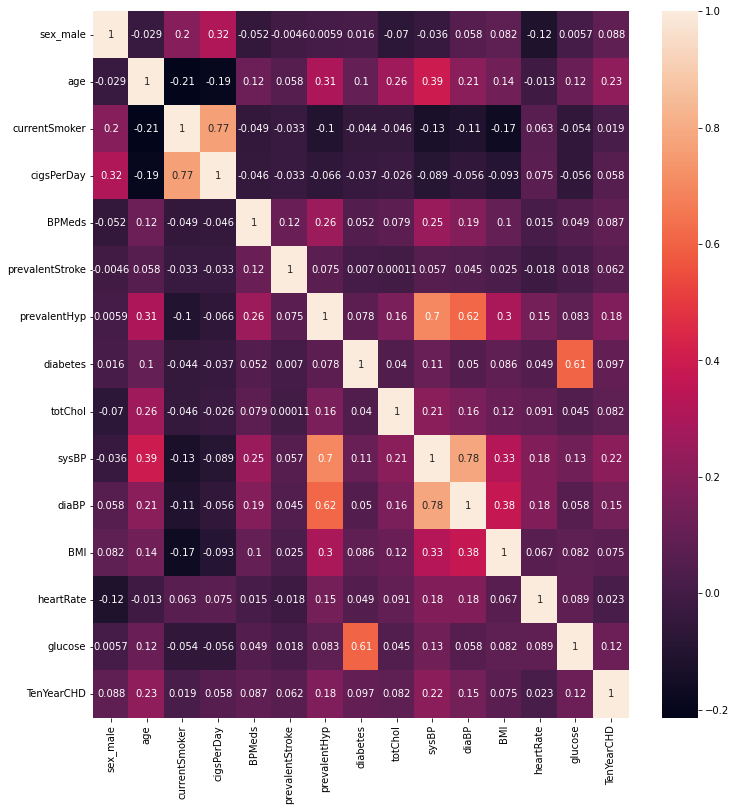

In [12]:
import seaborn as sns
plt.figure(figsize=(12,13))
sns.heatmap(df4,annot=True)

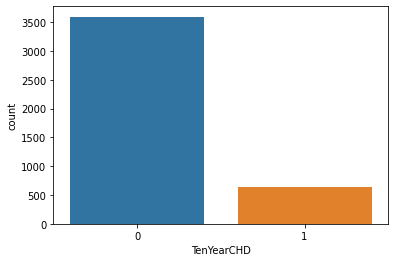

In [13]:
import seaborn as sns
sns.countplot(x=df["TenYearCHD"])

###Q6a. Split the dataset into train and test and fit the training dataset in the Logistic Regression. 

In [14]:
#Split the dataset and fit the model
from sklearn.model_selection import train_test_split
X = df[['age','prevalentHyp','sysBP']]
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 101)



In [15]:
print(X_train)

      age  prevalentHyp  sysBP
4001   58             1  165.0
3747   59             1  149.0
1315   60             0  114.0
2328   66             1  145.0
482    44             1  158.0
...   ...           ...    ...
4079   62             0  104.0
4171   41             0  125.0
599    44             1  123.0
1361   44             1  141.0
1547   42             0  138.0

[2840 rows x 3 columns]


In [16]:
print(X_test)

      age  prevalentHyp  sysBP
484    62             0  126.0
1195   62             1  145.5
1260   52             1  144.0
2417   61             0  147.5
2584   43             0  129.0
...   ...           ...    ...
380    55             0  123.0
3992   43             0  101.0
3053   54             0  127.5
2603   57             1  125.0
1077   54             0  131.0

[1400 rows x 3 columns]


In [28]:
#fit the model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(fit_intercept = True)

In [29]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [30]:
pred = logmodel.predict(X_test)

In [31]:
#predict the target values
train_score = logmodel.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = logmodel.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 84.8943661971831
Test score of trained model: 85.07142857142857


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
matrix = confusion_matrix(y_test,pred)
print(matrix)
accuracy_score(y_test,pred)

[[1187    2]
 [ 207    4]]


0.8507142857142858

###Q6b. Does running the above code give a Convergence Warning? What could be the cause of this problem? Try to find out methods that can deal with this problem.

Although there are several methods, we will use backward feature selection to solve this problem. You can learn more about feature selection using the below link. 

https://www.javatpoint.com/feature-selection-techniques-in-machine-learning

Understand and run the following 4 cells which carry out backward feature selection for you. Make sure to replace 'df' by your dataframe variable

In [41]:
from statsmodels.tools import add_constant as add_constant
df4_constant=add_constant(df4)
df4_constant.head()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
sex_male,1.0,1.000000,-0.029014,0.197026,0.316023,-0.052203,-0.004550,0.005853,0.015693,-0.070064,-0.035879,0.058199,0.081705,-0.116913,0.005718,0.088374
age,1.0,-0.029014,1.000000,-0.213662,-0.192534,0.122036,0.057679,0.306799,0.101314,0.260691,0.394053,0.205586,0.135578,-0.012839,0.116951,0.225408
currentSmoker,1.0,0.197026,-0.213662,1.000000,0.767055,-0.048621,-0.032980,-0.103710,-0.044285,-0.046211,-0.130281,-0.107933,-0.167483,0.062678,-0.054062,0.019448
cigsPerDay,1.0,0.316023,-0.192534,0.767055,1.000000,-0.045847,-0.032711,-0.066444,-0.037086,-0.026182,-0.088523,-0.056473,-0.092888,0.075257,-0.056020,0.057646
BPMeds,1.0,-0.052203,0.122036,-0.048621,-0.045847,1.000000,0.115008,0.259125,0.051584,0.078973,0.252023,0.192387,0.099586,0.015172,0.048925,0.086805


In [42]:
st.chisqprob = lambda chisq, df4: st.chi2.sf(chisq, df4)
cols = df4_constant.columns[:-1]
model = sm.Logit(df4.TenYearCHD, df4_constant[cols])
result = model.fit()
result.summary()

PerfectSeparationError: ignored

In [36]:
def back_feature_elem (data_frame, dep_var, col_list):
    while len(col_list)>0 :
        model = sm.Logit(dep_var,data_frame[col_list])
        result = model.fit(disp=0)
        largest_pvalue = round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list = col_list.drop(largest_pvalue.index)
result = back_feature_elem(df4_constant, df4.TenYearCHD, cols)
result.summary()

PerfectSeparationError: ignored

In [43]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue = round(result.pvalues,3)
conf['pvalue'] = pvalue
conf.columns = ['CI 95%(2.5%)','CI 95%(97.5%)', 'Odds Ratio', 'pvalue']
print((conf))

NameError: ignored

###Q7. The above table mentions the columns with the highest importance. Create a new dataframe with just these columns and your target column. Split it into training and testing dataset and fit the training data into Logistic regression model. Also predict the y values for the test set.

In [44]:
#Split the new dataset and fit the model


###Q8a. Create a confusion matrix for y test and y predcted values. Since this is prediction of heart disease which metric should be given more importance - Precision or Recall? Justify.

In [45]:
#Code for confusion matrix
from sklearn import metrics
metrics.confusion_matrix(y_test, pred)

array([[1187,    2],
       [ 207,    4]])

###Q8b. Using the above confusion matrix, how would you find out Accuracy, Precision and Recall values. Calculate them using the formulae which takes into account True Positive, False Positive, True Negative and False Negative values.

In [46]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [47]:
precision=precision_score(y_test,pred)
recall=recall_score(y_test,pred)

In [48]:
precision

0.6666666666666666

In [49]:
recall

0.018957345971563982

In [50]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,pred)
accuracy

0.8507142857142858